In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
dte = pd.read_csv(r'C:\Users\REBIRTH JEREMYELEVEN\Desktop\1.04.+Real-life+example.csv')

In [3]:
dte.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
dte.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Data Cleaning

In [5]:
dte1 = dte.drop(['Model'],axis=1)

In [6]:
dte1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
dte2 = dte1.dropna(axis=0)

In [8]:
dte2.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [9]:
q = dte2['Year'].quantile(0.01)

dte3 = dte2[dte2['Year']>q]

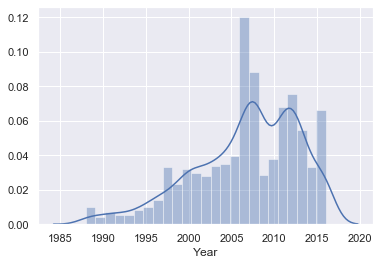

In [10]:
sns.distplot(dte3['Year'])

In [11]:
dte3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3969,3969.000000,3969,3969.000000,3969.000000,3969,3969,3969.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,866,NaN,1500,NaN,NaN,1850,3598,NaN
mean,NaN,19782.123988,NaN,162.738221,2.776105,NaN,NaN,2006.687831
std,NaN,25918.538393,NaN,102.930235,4.969395,NaN,NaN,6.202932
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7170.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


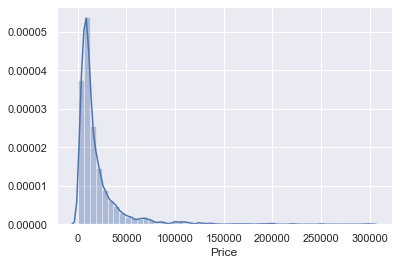

In [12]:
sns.distplot(dte3["Price"])

In [13]:
q1 = dte3['Price'].quantile(0.99)

dte4 = dte3[dte3['Price'] < q1]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3928,3928.000000,3928,3928.000000,3928.000000,3928,3928,3928.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,866,NaN,1494,NaN,NaN,1842,3557,NaN
mean,NaN,18044.879356,NaN,164.295825,2.755112,NaN,NaN,2006.603106
std,NaN,19022.857573,NaN,102.297583,4.990056,NaN,NaN,6.176882
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


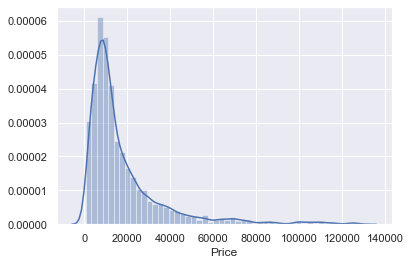

In [14]:
sns.distplot(dte4['Price'])
dte4.describe(include='all')

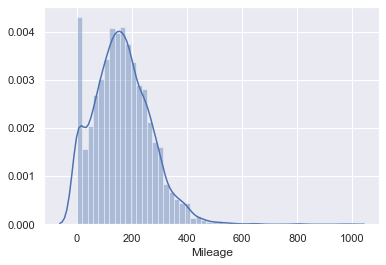

In [15]:
sns.distplot(dte4['Mileage'])

In [16]:
q2 = dte4['Mileage'].quantile(0.99)
dte5 = dte4[dte4['Mileage']  < q2]
dte5.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3888,3888.000000,3888,3888.000000,3888.000000,3888,3888,3888.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,852,NaN,1478,NaN,NaN,1813,3521,NaN
mean,NaN,18144.852395,NaN,160.613426,2.758714,NaN,NaN,2006.698045
std,NaN,19054.778884,NaN,95.418939,5.014947,NaN,NaN,6.103167
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21562.500000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


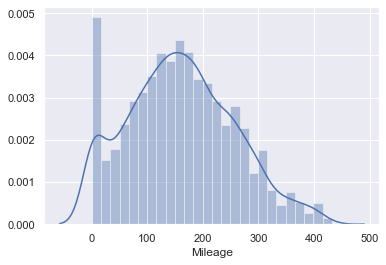

In [17]:
sns.distplot(dte5['Mileage'])

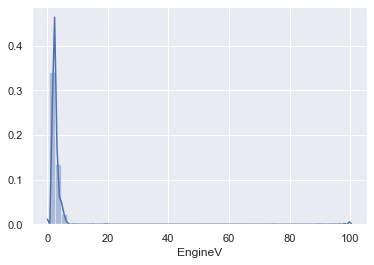

In [18]:
sns.distplot(dte5['EngineV'])

In [19]:
dte6 = dte5[dte5['EngineV'] < 6.5]

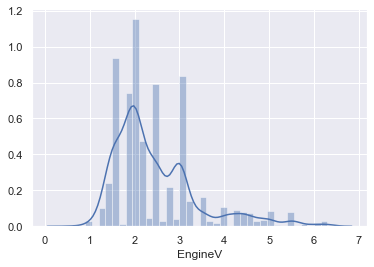

In [20]:
sns.distplot(dte6['EngineV'])

In [21]:
dc = dte6

## Checking If Linear Regression Assumptions Are Met

### 1. Linearity

In [22]:
dcf = dc.reset_index(drop=True)
dcf['Log_Price'] = np.log(dcf['Price'])



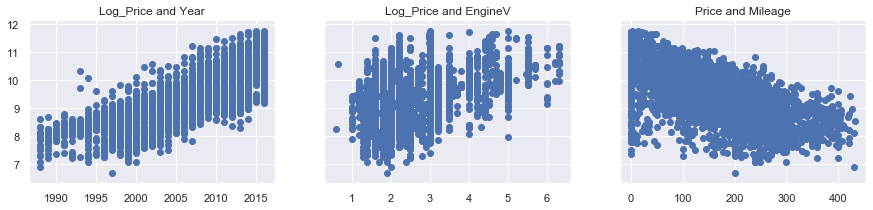

In [23]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(dcf['Year'],dcf['Log_Price'])
ax1.set_title('Log_Price and Year')
ax2.scatter(dcf['EngineV'], dcf['Log_Price'] )
ax2.set_title('Log_Price and EngineV')
ax3.scatter(dcf['Mileage'], dcf['Log_Price'])
ax3.set_title('Price and Mileage')

plt.show()

### 2. Multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vi = variance_inflation_factor

In [26]:
var = dcf[['Year','Mileage','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [vi(var.values,i) for i in range(var.shape[1])] 
vif['Feature'] = var.columns

In [27]:
vif

,VIF,Feature
0,10.361600,Year
1,3.797050,Mileage
2,7.658673,EngineV


In [28]:
dti = dcf.drop(['Year'], axis=1)

In [29]:
dti1 = dti.drop(['Price'],axis=1)

In [92]:
dti1 = dti1.reset_index(drop=True)
dti1.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


### Getting Dummy Variables

In [94]:
dwd = pd.get_dummies(dti1, drop_first=True)

In [95]:
dwd.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearranging Columns

In [96]:
dwd.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [97]:
cols = ['Log_Price', 'EngineV', 'Mileage', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [98]:
df = dwd[cols]

In [99]:
df.head()

,Log_Price,EngineV,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,2.0,277,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,2.9,427,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,5.0,358,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,4.2,240,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,2.0,120,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Set Variables For Linear Regression

In [100]:
y = df['Log_Price']
x1 = df.drop(['Log_Price'], axis=1)

### Standardize Independent Variables

In [101]:
from sklearn.preprocessing import StandardScaler


In [102]:
scaler  = StandardScaler()
scaler.fit(x1)
scaler.transform(x1)

array([[-0.47424997,  1.22166004,  2.27901519, ..., -0.16213525,
         1.33288426,  0.32097525],
       [ 0.47370493,  2.79327781, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       [ 2.6855997 ,  2.07033364, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       ...,
       [ 0.57903325, -1.58629705, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       [ 1.10567486, -1.67011666,  2.27901519, ..., -0.16213525,
         1.33288426,  0.32097525],
       [-0.47424997, -0.38139009, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525]])

### Spliting Data Into Train and Test Data

In [103]:
from sklearn.model_selection import train_test_split

In [120]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.1, random_state = 365)

### Training The Model (Linear Regression for Train Data)

In [105]:
from sklearn.linear_model import LinearRegression

In [121]:
reg = LinearRegression()

In [122]:
reg.fit(x1_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Prediction

In [124]:
yhat = reg.predict(x1_train)

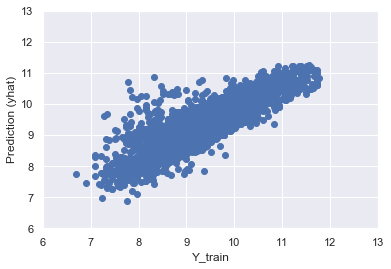

In [125]:
plt.scatter(y_train, yhat)
plt.xlabel('Y_train')
plt.ylabel('Prediction (yhat)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Calculating Coefficients and constants

In [127]:
#Coefficients

df1 = pd.DataFrame()
df1['Features'] = x1.columns.values
df1['Coefficients'] = reg.coef_

In [128]:
df1

,Features,Coefficients
0,EngineV,0.218621
1,Mileage,-0.004780
2,Brand_BMW,0.061766
3,Brand_Mercedes-Benz,0.040117
4,Brand_Mitsubishi,-0.490500
5,Brand_Renault,-0.570983
6,Brand_Toyota,-0.154912
7,Brand_Volkswagen,-0.210600
8,Body_hatch,-0.607237
9,Body_other,-0.340551


In [130]:
#Constant

reg.intercept_

9.292753146597441

In [131]:
#R-Squared

reg.score(x1_train, y_train)

0.7481224780037947

### Testing Data

In [133]:
yhat1 = reg.predict(x1_test)

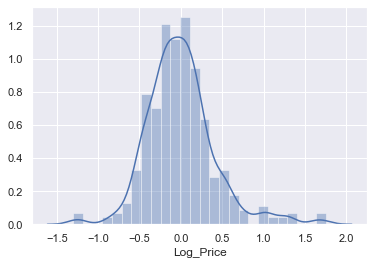

In [135]:
sns.distplot(yhat1 - y_test)

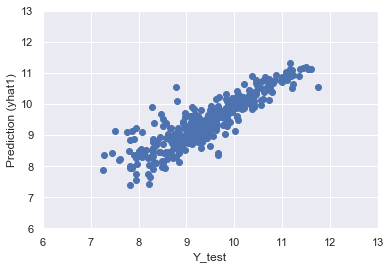

In [136]:
plt.scatter(y_test, yhat1)
plt.xlabel('Y_test')
plt.ylabel('Prediction (yhat1)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Checking Performance

In [138]:
y_test = y_test.reset_index(drop=True)

In [145]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' % x)


p = pd.DataFrame()
p['Prediction'] = np.exp(yhat1)
p['Actual'] = np.exp(y_test)
p['Error'] = p['Actual'] - p['Prediction']
p['% Error'] = np.absolute((p['Error'] / p['Actual'])*100)



In [146]:
p.sort_values(by=['% Error'])

,Prediction,Actual,Error,% Error
130,10441.03,10450.00,8.97,0.09
131,9633.12,9600.00,-33.12,0.35
185,8469.55,8499.00,29.45,0.35
347,29762.28,29900.00,137.72,0.46
251,22613.45,22500.00,-113.45,0.50
56,14618.74,14700.00,81.26,0.55
124,8957.12,8900.00,-57.12,0.64
287,22891.35,22711.65,-179.70,0.79
359,6557.86,6500.00,-57.86,0.89
200,8720.72,8800.00,79.28,0.90
